In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
len(df)

200

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
print(sum(df.duplicated()))
df = df.drop_duplicates()

0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 15.9 KB


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

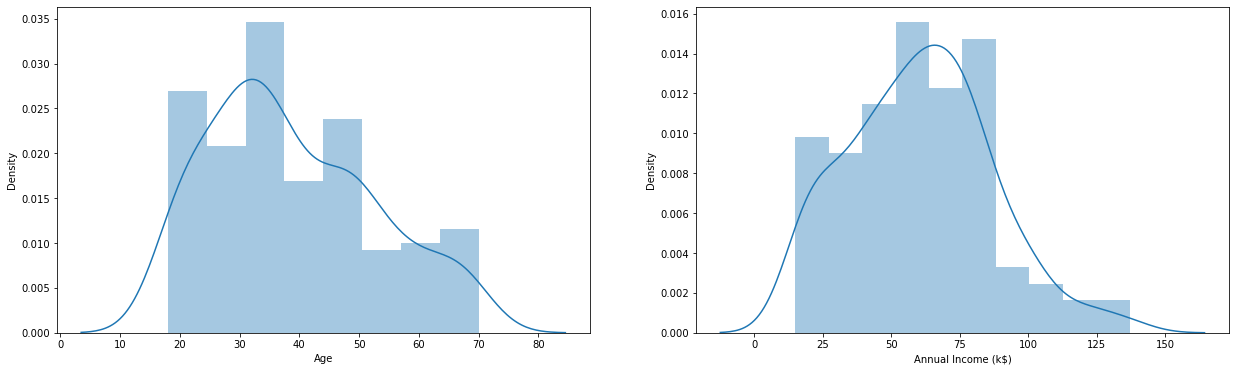

In [7]:
ig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['Age'], ax=axes[0])
sns.distplot(df['Annual Income (k$)'], ax=axes[1])

In [34]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,0.390000
std,0.497633,13.969007,26.264721,0.488974
min,0.000000,18.000000,15.000000,0.000000
25%,0.000000,28.750000,41.500000,0.000000
50%,1.000000,36.000000,61.500000,0.000000
75%,1.000000,49.000000,78.000000,1.000000
max,1.000000,70.000000,137.000000,1.000000


In [35]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

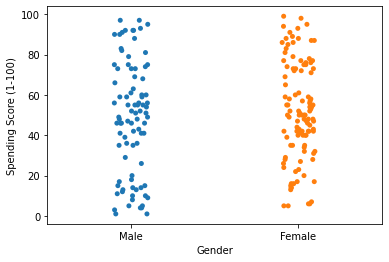

In [8]:
sns.stripplot(x='Gender', y = 'Spending Score (1-100)', data = df)

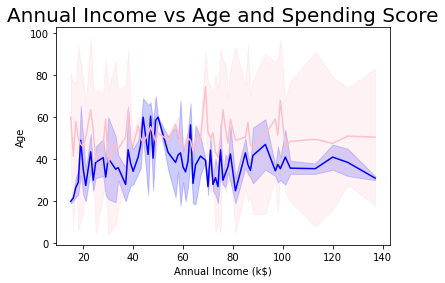

In [9]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [10]:
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True) 

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [12]:
df.drop('CustomerID', axis=1, inplace = True)

In [13]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
5,1,22,17,76
6,1,35,18,6
7,1,23,18,94
8,0,64,19,3
9,1,30,19,72


<AxesSubplot:>

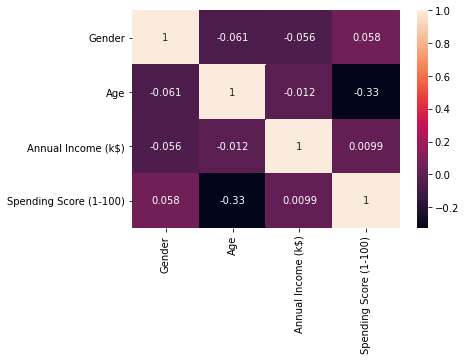

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
def impute_age(cols):
    spend=cols
    if spend > 55:
         return 1
    else:
         return 0
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].apply(impute_age)
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('Spending Score (1-100)',axis=1), df['Spending Score (1-100)'], test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
pred=log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        36
           1       0.57      0.33      0.42        24

    accuracy                           0.63        60
   macro avg       0.61      0.58      0.58        60
weighted avg       0.62      0.63      0.61        60



In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spending Score (1-100)',axis=1))
scaled_features = scaler.transform(df.drop('Spending Score (1-100)',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Gender,Age,Annual Income (k$)
0,-1.128152,-1.424569,-1.738999
1,-1.128152,-1.281035,-1.738999
2,0.886405,-1.352802,-1.700830
3,0.886405,-1.137502,-1.700830
4,0.886405,-0.563369,-1.662660


# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Replace strings with an integer
        

In [22]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0
5,1,22,17,1
6,1,35,18,0
7,1,23,18,1
8,0,64,19,0
9,1,30,19,1


In [23]:
# Build the model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
# Score
print('Training score:', dTree.score(X_train, y_train))
print('Test score:', dTree.score(X_test, y_test))

Training score: 0.9928571428571429
Test score: 0.6666666666666666


In [25]:
# Visualizing the tree
from sklearn.tree import export_graphviz
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names
= list(train_char_label))
Credit_Tree_File.close()

In [26]:
from os import system
from IPython.display import Image
import matplotlib.pyplot as plt

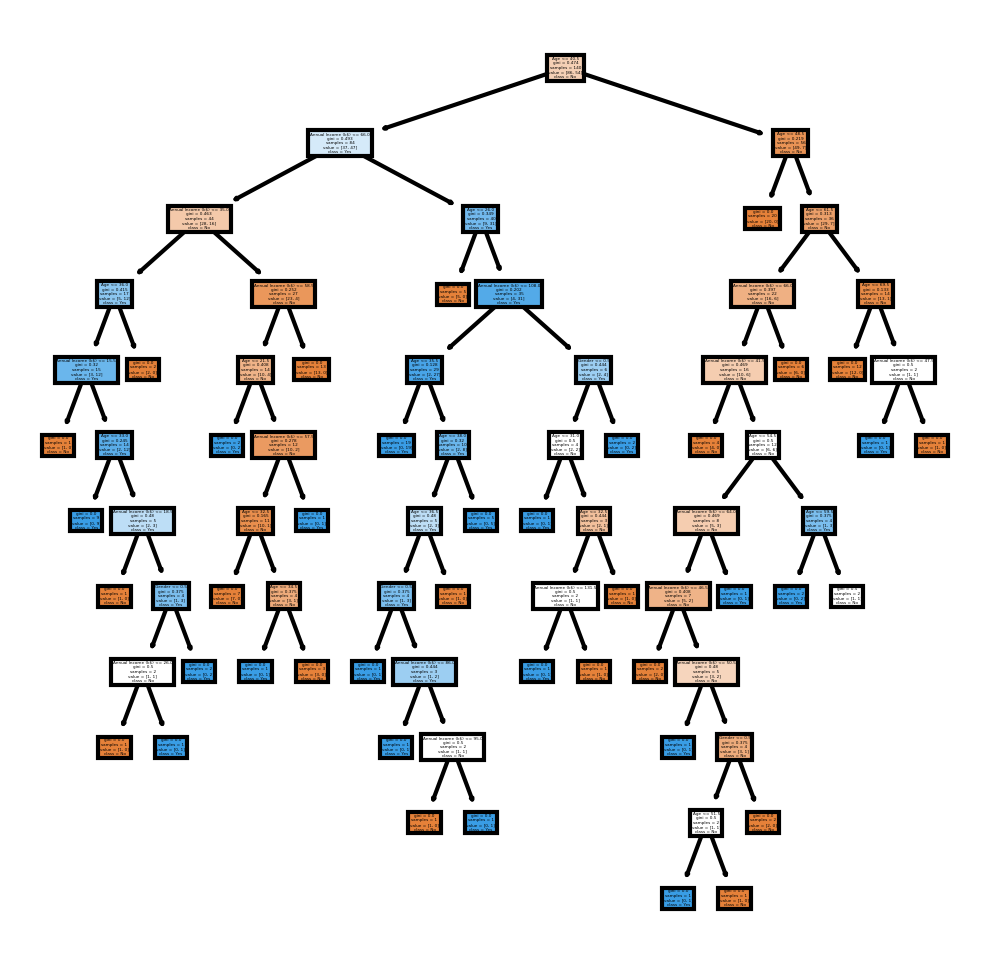

In [27]:
from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)
fig.savefig('mall.png')

In [28]:
# Feature importance
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                         Imp
Gender              0.028057
Age                 0.536184
Annual Income (k$)  0.435759


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9928571428571429


In [31]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7166666666666667


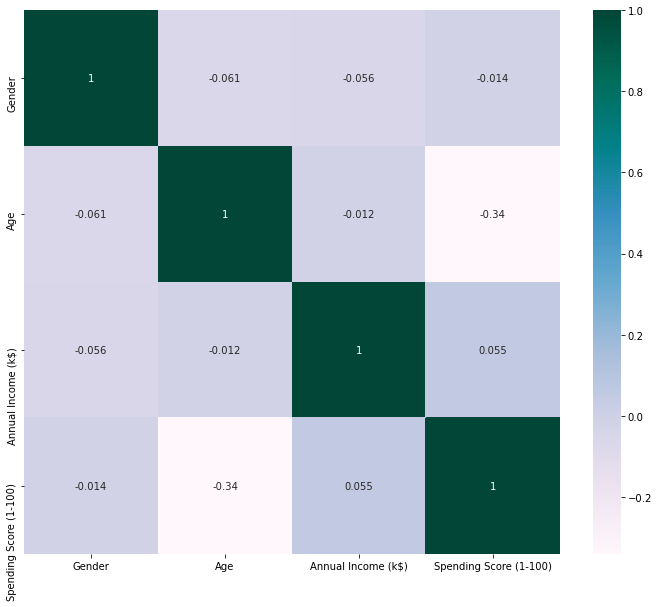

In [32]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='PuBuGn')

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression # To model the ordinary least squares Linear  Regression 
from sklearn.linear_model import Ridge # To model Linear least squares with l2 regularization from sklearn.linear_model import Lasso # Linear Model trained with L1 prior as regularizer   
# Metrics 
from sklearn import metrics # sklearn metrics module implements utility functions  to measure classification performance 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lr = LinearRegression() 
lr.fit(X_train, y_train) # Fitting the model on Training data 
y_pred_lr = lr.predict(X_test) # Making predictions on Test data 
print("Linear Regression model coefficients:", (lr.coef_)) # Printing the coefficients print('\nLR R2_score on training data:',lr.score(X_train, y_train)) 
print('LR R2_score on test data:',lr.score(X_test, y_test)) 
print('LR Mean Square Error :',mean_squared_error(y_test,y_pred_lr)) 
print('LR Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LR Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lr)) 

Linear Regression model coefficients: [ 0.02334719 -0.00962059  0.00172494]
LR R2_score on test data: 0.1499432325742115
LR Mean Square Error : 0.20401362418218927
LR Root Mean Square Error : 0.45167867359682734
LR Mean Absolute Error : 0.425759606285126


In [43]:
# Creating a regularized RIDGE model  
ridge = Ridge(alpha=.3) 
ridge.fit(X_train,y_train) # Fitting the model on Training data
y_pred_ridge = ridge.predict(X_test) # Making predictions on Test data
print("Ridge model coefficients:", (ridge.coef_)) # Printing the coefficients print('\nRidge R2_score on training data:',ridge.score(X_train, y_train)) print('Ridge R2_score on test data:',ridge.score(X_test, y_test)) 
print('Ridge Mean Square Error :',mean_squared_error(y_test,y_pred_ridge)) 
print('Ridge Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Ridge Mean Absolute Error :',mean_absolute_error(y_test, y_pred_ridge)) 


Ridge model coefficients: [ 0.02314454 -0.00962107  0.00172462]
Ridge Mean Square Error : 0.20399509169464075
Ridge Root Mean Square Error : 0.4516581580074036
Ridge Mean Absolute Error : 0.42574182025284685


# K Means Clustering

In [48]:
from sklearn.cluster import KMeans 

In [52]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

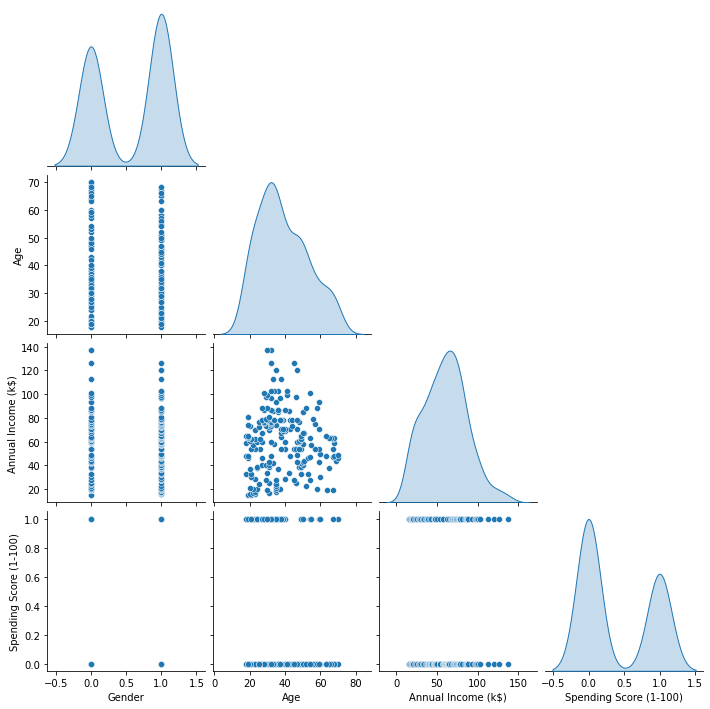

In [59]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

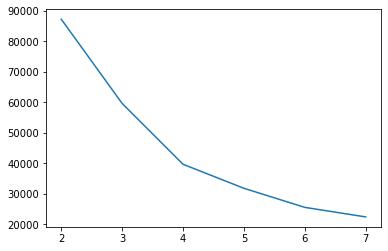

In [61]:
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [63]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster.fit(df)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [65]:
# Cluster labels

cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [67]:
# Assign the label
df['Cluster_Id'] = cluster.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,0,19,15,0,2
1,0,21,15,1,2
2,1,20,16,0,2
3,1,23,16,1,2
4,1,31,17,0,2


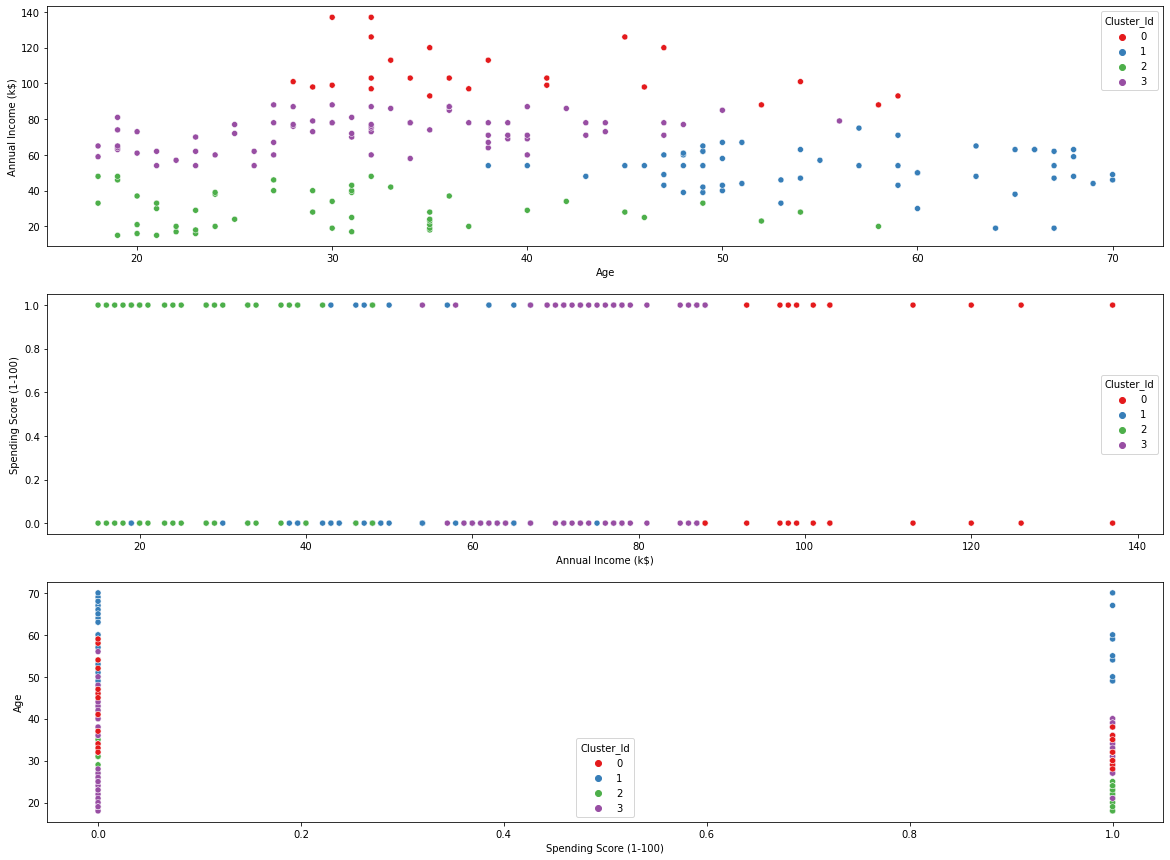

In [68]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',hue='Cluster_Id',data = df,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue='Cluster_Id', data = df,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Age',hue='Cluster_Id',data= df,legend='full',palette="Set1")
plt.show()

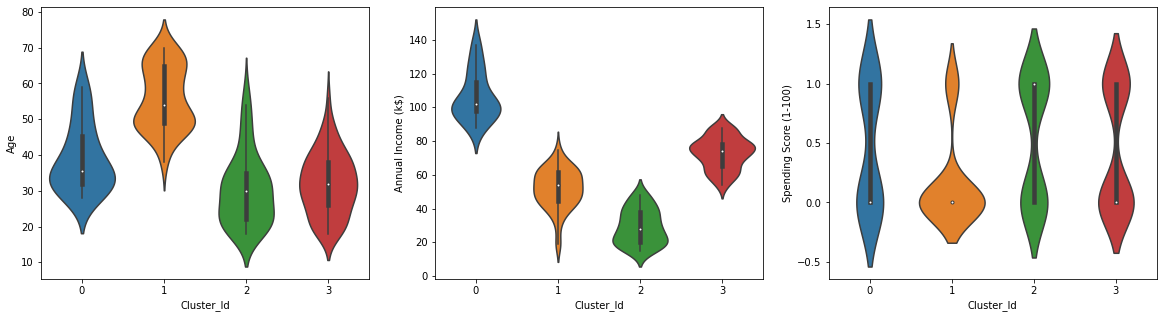

In [69]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Cluster_Id', y = 'Age', data = df,ax=axes[0])
sns.violinplot(x = 'Cluster_Id', y = 'Annual Income (k$)', data = df,ax=axes[1])
sns.violinplot(x = 'Cluster_Id', y = 'Spending Score (1-100)', data=df,ax=axes[2])
plt.show()

# KNN

In [70]:
numberList = list(range(1,20)) 
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) 

In [71]:
ac_scores = [] 

In [73]:
from sklearn.neighbors import KNeighborsClassifier # To model the KNN classifier 
# Metrics 
from sklearn import metrics # sklearn metrics module implements utility functions to  measure classification performance 
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of  a classification 
from sklearn import preprocessing # Provides several common utility functions: standardization  of the data set 
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean and  scaling to unit variance 
from sklearn.metrics import accuracy_score 


In [74]:
for k in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train.values.ravel())  
    y_pred = knn.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)


In [75]:
MSE = [1 - x for x in ac_scores]  

In [76]:
optimal_k = neighbors[MSE.index(min(MSE))] 

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.6666666666666666, 0.65, 0.6333333333333333, 0.65, 0.6666666666666666, 0.6833333333333333, 0.7, 0.7166666666666667, 0.7166666666666667, 0.6833333333333333]

Misclassification error :
 [0.33333333333333337, 0.35, 0.3666666666666667, 0.35, 0.33333333333333337, 0.31666666666666665, 0.30000000000000004, 0.2833333333333333, 0.2833333333333333, 0.31666666666666665]

The optimal number of neighbor is k= 15


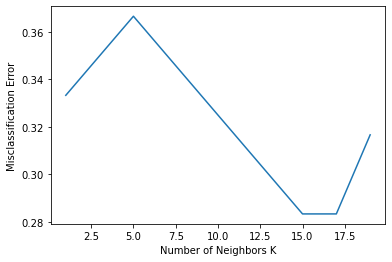

In [77]:
print('Odd Neighbors : \n', neighbors) 
print('\nAccuracy Score : \n', ac_scores) 
print('\nMisclassification error :\n', MSE) 
print("\nThe optimal number of neighbor is k=",optimal_k) 
# plot misclassification error vs k 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error') 
plt.show() 

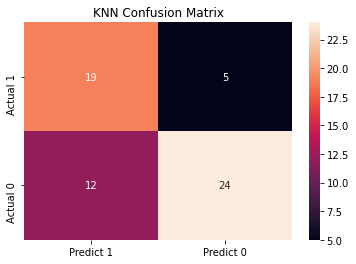

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train) 
knn_pred = knn_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0]) 
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]], 
 columns = [i for i in ["Predict 1","Predict 0"]]) 
plt.title('KNN Confusion Matrix') 
sns.heatmap(df_cm, annot=True, fmt='g');



In [81]:
TP = cm[0,0] 
FP = cm[0,1] 
FN = cm[1,0] 
TN = cm[1,1] 
# Print classification accuracy 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN) 
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy)) 

Classification accuracy: 0.7167
